# Introducción al Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de datos (EDA, por sus siglas en inglés) es una etapa fundamental en cualquier proyecto de ciencia de datos. Su objetivo principal es comprender la estructura, las características y las relaciones presentes en los datos, así como identificar posibles problemas o patrones que puedan influir en el análisis posterior. En este caso, el conjunto de datos analizado contiene información sobre estudiantes, sus características sociodemográficas, académicas y su rendimiento global.

## Objetivos del EDA
1. **Comprender la estructura de los datos**: Identificar las variables presentes, sus tipos de datos y la cantidad de valores nulos o faltantes.
2. **Analizar las variables categóricas**: Examinar la distribución de las categorías, los valores más frecuentes y su relación con el rendimiento global.
3. **Analizar las variables numéricas**: Evaluar estadísticas descriptivas como la media, mediana, desviación estándar y detectar posibles valores atípicos (outliers).
4. **Explorar relaciones entre variables**: Identificar correlaciones y patrones entre variables numéricas y categóricas, así como su impacto en el rendimiento global.
5. **Visualizar los datos**: Utilizar gráficos como histogramas, boxplots, heatmaps y gráficos de barras para facilitar la interpretación de los resultados.

## Aspectos Clave del Conjunto de Datos
- **Tamaño del conjunto de datos**: El conjunto de datos contiene 692,500 registros completos y 21 columnas.
- **Variables categóricas**: Variables como `PERIODO_ACADEMICO`, `E_PRGM_ACADEMICO`, `F_EDUCACIONMADRE`, entre otras, permiten analizar distribuciones y frecuencias.
- **Variables numéricas**: Indicadores como `INDICADOR_1`, `INDICADOR_2`, `INDICADOR_3` y `INDICADOR_4` ofrecen información cuantitativa para evaluar el rendimiento.
- **Valores faltantes**: Algunas columnas presentan valores nulos, como `E_VALORMATRICULAUNIVERSIDAD` y `F_TIENEAUTOMOVIL`, lo que requiere atención para el tratamiento de datos.

## Metodología
1. **Carga y limpieza de datos**: Se identificaron y visualizaron valores faltantes mediante un mapa de calor.
2. **Transformación de datos**: Algunas variables categóricas, como `PERIODO_ACADEMICO` y `RENDIMIENTO_GLOBAL`, fueron convertidas a tipos de datos más apropiados.
3. **Análisis univariado**: Se exploraron las distribuciones de las variables categóricas y numéricas.
4. **Análisis bivariado**: Se evaluaron relaciones entre variables independientes y el rendimiento global utilizando pruebas estadísticas como ANOVA y Chi-cuadrado.
5. **Visualización**: Se emplearon gráficos para representar distribuciones, proporciones y relaciones entre variables.


In [ ]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Cargamos el conjunto de datos
df = pd.read_csv('data/train.csv')

In [ ]:
# Observamos las primeras filas del DataFrame
df.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

```markdown
En su mayoria el dataset contiene variables categoricas de varios tipos

In [9]:
df.describe()

,ID,PERIODO_ACADEMICO,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


Aca vemos que probablemente que el Periodo academico es una variable que está correctamente etiquetada, por lo que decidimos cambiar su tipo despues de un analisis de mapa de calor para deteccion de valores nulos

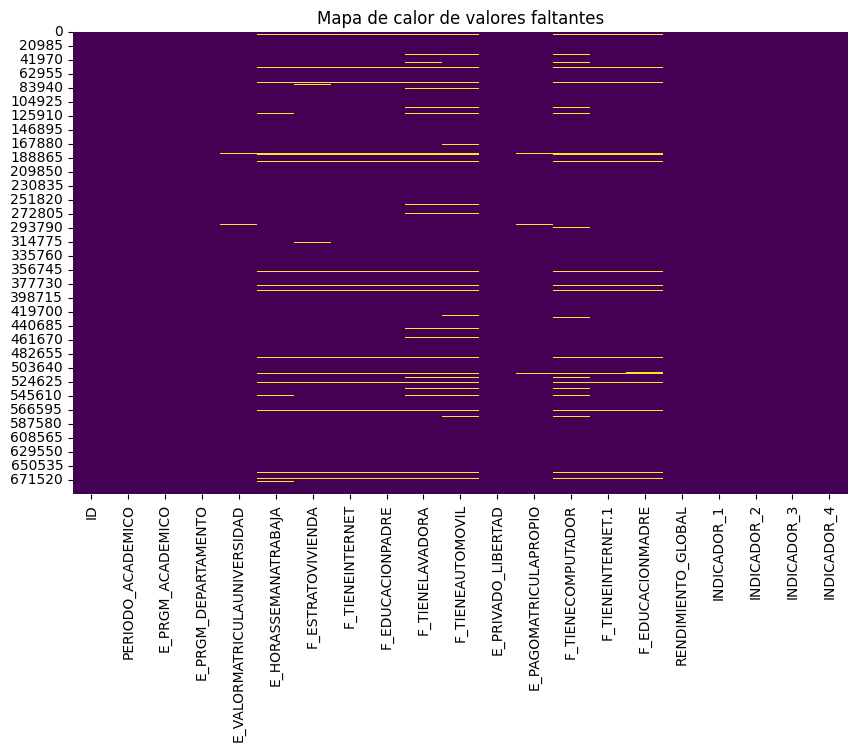

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

Este mapa de calor muestra que la cantidad de valores nulos por columnas es bajo, por lo que no afectaria de forma significativa el modelo a futuro.

In [20]:
df["PERIODO_ACADEMICO"] = df["PERIODO_ACADEMICO"].astype('category')


## Distribuciones y Summary de variables categoricas

Hacemos un muestreo de las variables categoricas y usamos histogramas para determinar su distribucion muestral, ademas de extraer la moda de cada columna categorica y el top-4 categorias mas frecuentes por cada categoria.

--- PERIODO_ACADEMICO ---
Número de valores únicos: 9
Valores más frecuentes:
PERIODO_ACADEMICO
20195    0.261188
20203    0.248142
20212    0.247526
20183    0.238004
20194    0.002126
Name: proportion, dtype: float64

Moda: 20195
--------------------------------------------------


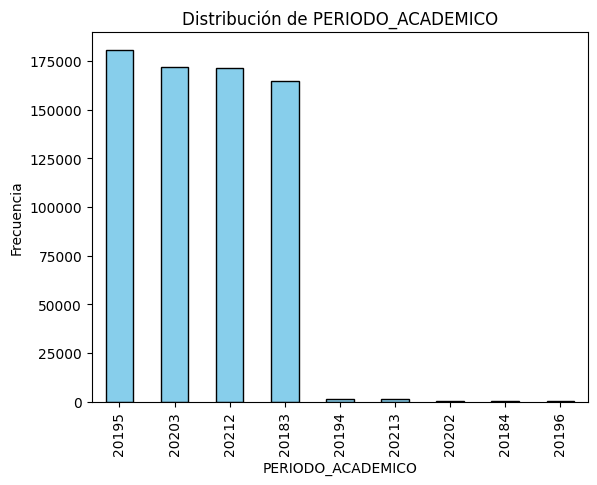

--- E_PRGM_ACADEMICO ---
Número de valores únicos: 948
Valores más frecuentes:
E_PRGM_ACADEMICO
DERECHO                       0.076887
ADMINISTRACION DE EMPRESAS    0.074949
CONTADURIA PUBLICA            0.057277
PSICOLOGIA                    0.046111
INGENIERIA INDUSTRIAL         0.041128
Name: proportion, dtype: float64

Moda: DERECHO
--------------------------------------------------


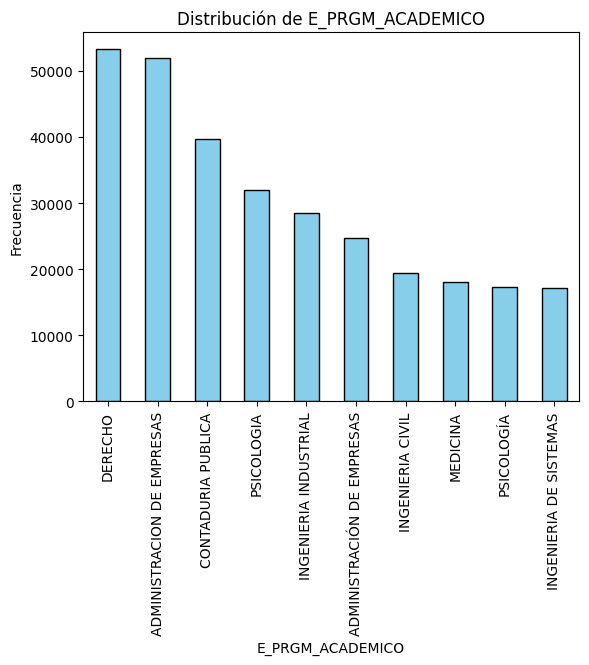

--- E_PRGM_DEPARTAMENTO ---
Número de valores únicos: 31
Valores más frecuentes:
E_PRGM_DEPARTAMENTO
BOGOTÁ       0.407450
ANTIOQUIA    0.120732
VALLE        0.064387
ATLANTICO    0.059235
SANTANDER    0.041629
Name: proportion, dtype: float64

Moda: BOGOTÁ
--------------------------------------------------


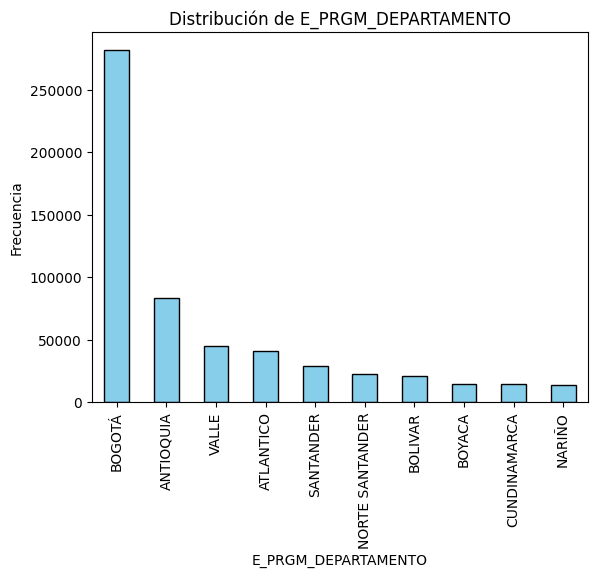

--- E_VALORMATRICULAUNIVERSIDAD ---
Número de valores únicos: 8
Valores más frecuentes:
E_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      0.297354
Entre 2.5 millones y menos de 4 millones    0.185700
Menos de 500 mil                            0.116965
Entre 500 mil y menos de 1 millón           0.114693
Entre 4 millones y menos de 5.5 millones    0.101624
Name: proportion, dtype: float64

Moda: Entre 1 millón y menos de 2.5 millones
--------------------------------------------------


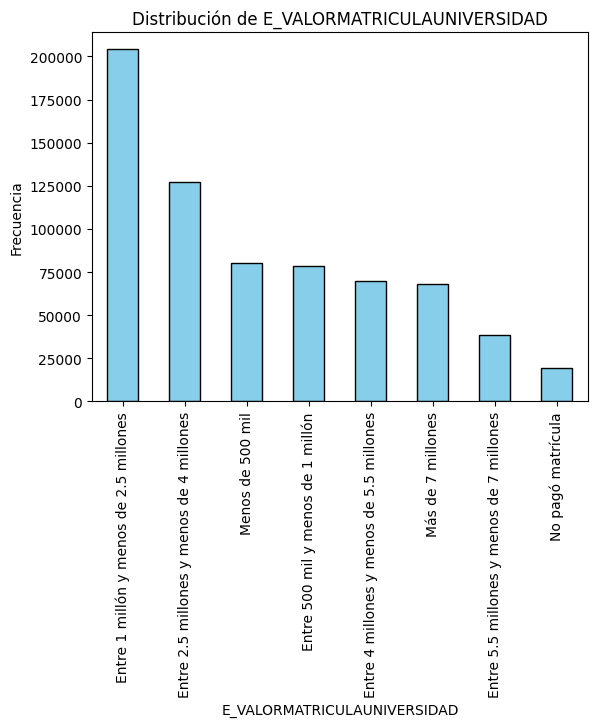

--- E_HORASSEMANATRABAJA ---
Número de valores únicos: 5
Valores más frecuentes:
E_HORASSEMANATRABAJA
Más de 30 horas        0.376868
0                      0.176152
Entre 11 y 20 horas    0.175105
Entre 21 y 30 horas    0.140095
Menos de 10 horas      0.131780
Name: proportion, dtype: float64

Moda: Más de 30 horas
--------------------------------------------------


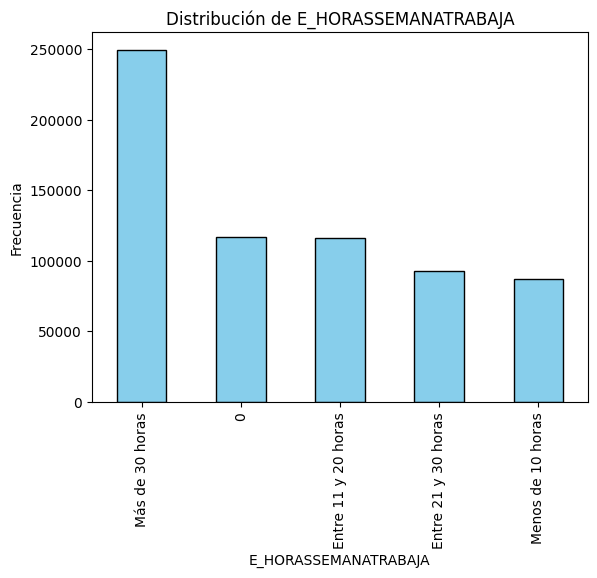

--- F_ESTRATOVIVIENDA ---
Número de valores únicos: 7
Valores más frecuentes:
F_ESTRATOVIVIENDA
Estrato 2    0.352338
Estrato 3    0.319044
Estrato 1    0.169590
Estrato 4    0.099209
Estrato 5    0.035750
Name: proportion, dtype: float64

Moda: Estrato 2
--------------------------------------------------


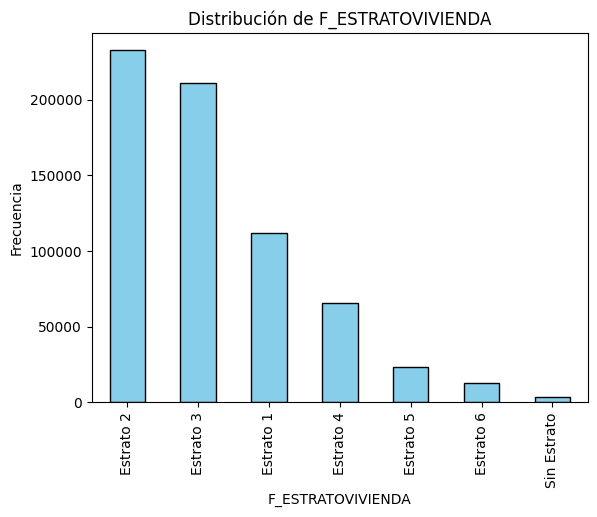

--- F_TIENEINTERNET ---
Número de valores únicos: 2
Valores más frecuentes:
F_TIENEINTERNET
Si    0.889833
No    0.110167
Name: proportion, dtype: float64

Moda: Si
--------------------------------------------------


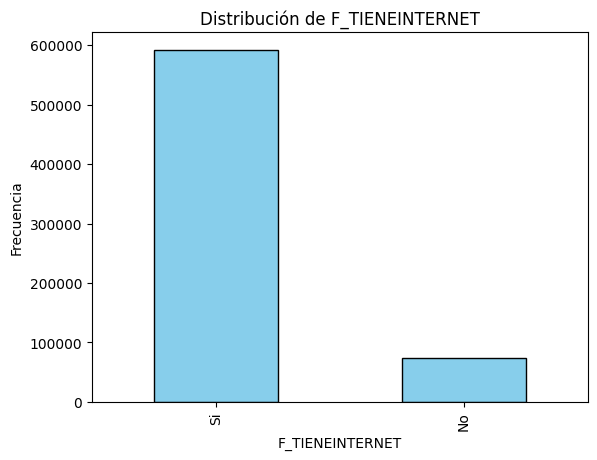

--- F_EDUCACIONPADRE ---
Número de valores únicos: 12
Valores más frecuentes:
F_EDUCACIONPADRE
Secundaria (Bachillerato) completa      0.191670
Primaria incompleta                     0.187765
Educación profesional completa          0.124181
Secundaria (Bachillerato) incompleta    0.107055
Técnica o tecnológica completa          0.094118
Name: proportion, dtype: float64

Moda: Secundaria (Bachillerato) completa
--------------------------------------------------


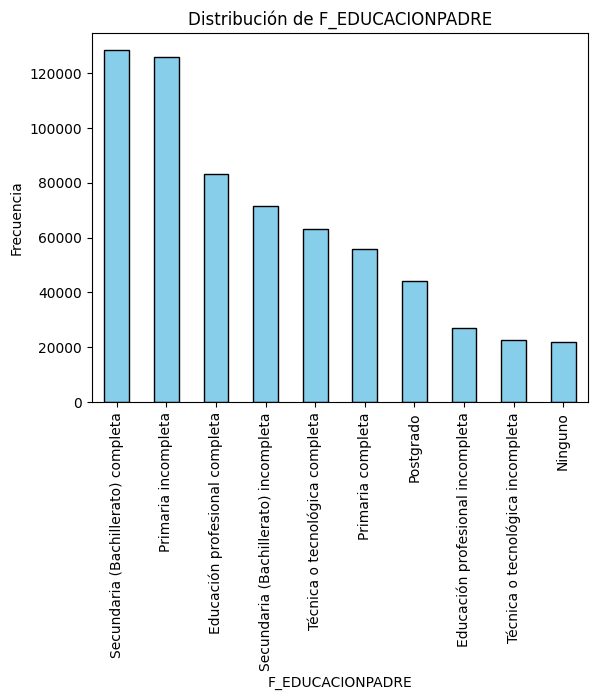

--- F_TIENELAVADORA ---
Número de valores únicos: 2
Valores más frecuentes:
F_TIENELAVADORA
Si    0.863133
No    0.136867
Name: proportion, dtype: float64

Moda: Si
--------------------------------------------------


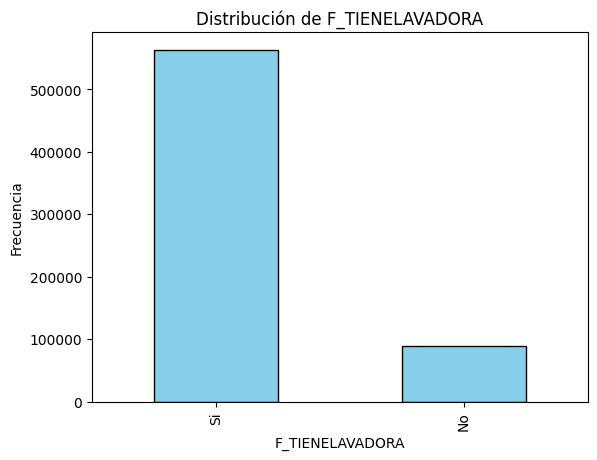

--- F_TIENEAUTOMOVIL ---
Número de valores únicos: 2
Valores más frecuentes:
F_TIENEAUTOMOVIL
No    0.635877
Si    0.364123
Name: proportion, dtype: float64

Moda: No
--------------------------------------------------


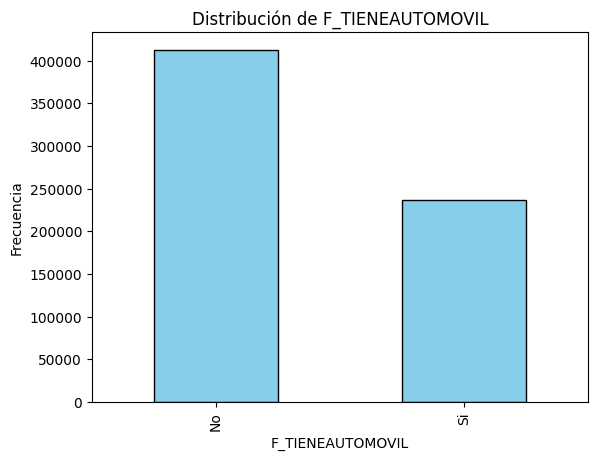

--- E_PRIVADO_LIBERTAD ---
Número de valores únicos: 2
Valores más frecuentes:
E_PRIVADO_LIBERTAD
N    0.999951
S    0.000049
Name: proportion, dtype: float64

Moda: N
--------------------------------------------------


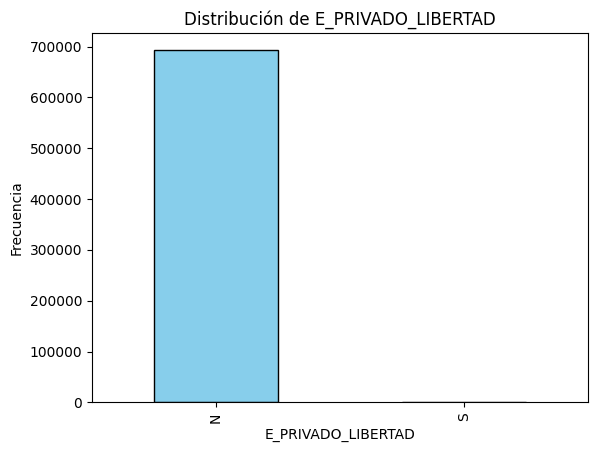

--- E_PAGOMATRICULAPROPIO ---
Número de valores únicos: 2
Valores más frecuentes:
E_PAGOMATRICULAPROPIO
No    0.557143
Si    0.442857
Name: proportion, dtype: float64

Moda: No
--------------------------------------------------


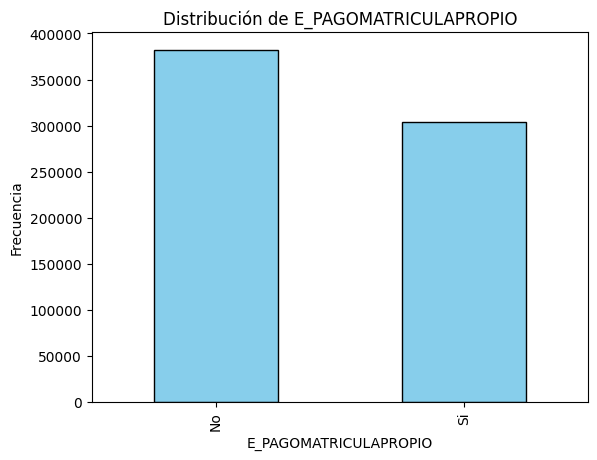

--- F_TIENECOMPUTADOR ---
Número de valores únicos: 2
Valores más frecuentes:
F_TIENECOMPUTADOR
Si    0.913314
No    0.086686
Name: proportion, dtype: float64

Moda: Si
--------------------------------------------------


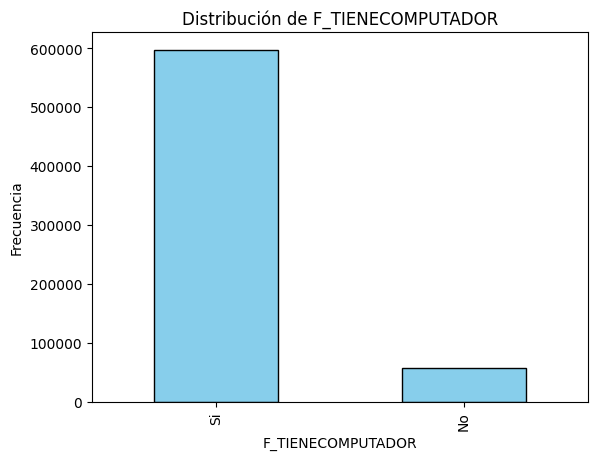

--- F_TIENEINTERNET.1 ---
Número de valores únicos: 2
Valores más frecuentes:
F_TIENEINTERNET.1
Si    0.889833
No    0.110167
Name: proportion, dtype: float64

Moda: Si
--------------------------------------------------


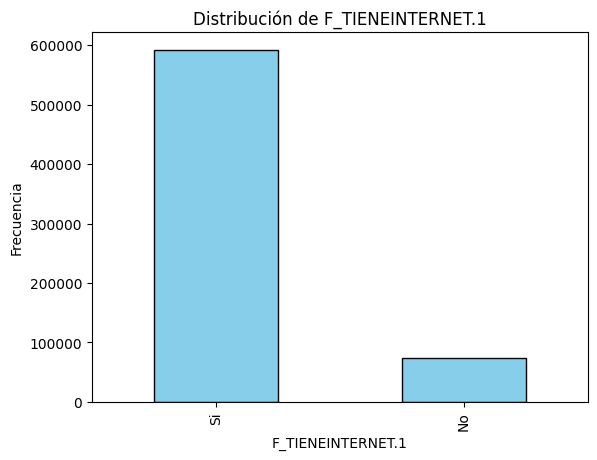

--- F_EDUCACIONMADRE ---
Número de valores únicos: 12
Valores más frecuentes:
F_EDUCACIONMADRE
Secundaria (Bachillerato) completa      0.211926
Primaria incompleta                     0.148646
Técnica o tecnológica completa          0.133877
Educación profesional completa          0.127574
Secundaria (Bachillerato) incompleta    0.121124
Name: proportion, dtype: float64

Moda: Secundaria (Bachillerato) completa
--------------------------------------------------


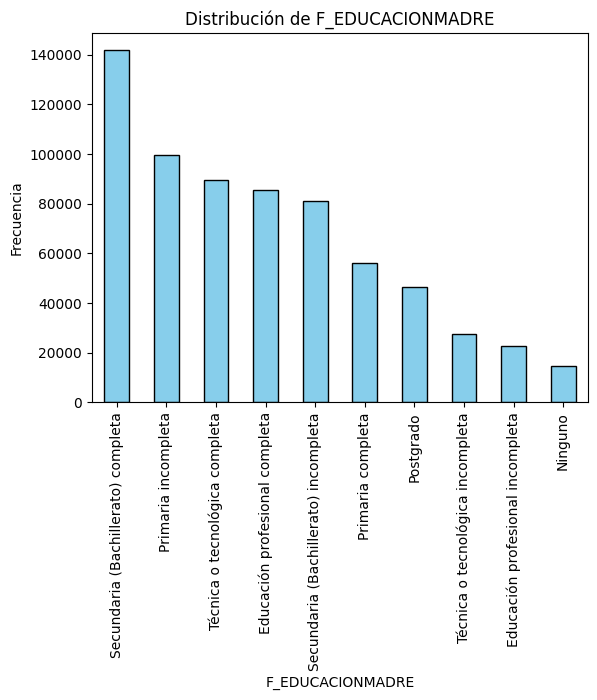

--- RENDIMIENTO_GLOBAL ---
Número de valores únicos: 4
Valores más frecuentes:
RENDIMIENTO_GLOBAL
alto          0.253601
bajo          0.249801
medio-bajo    0.248773
medio-alto    0.247825
Name: proportion, dtype: float64

Moda: alto
--------------------------------------------------


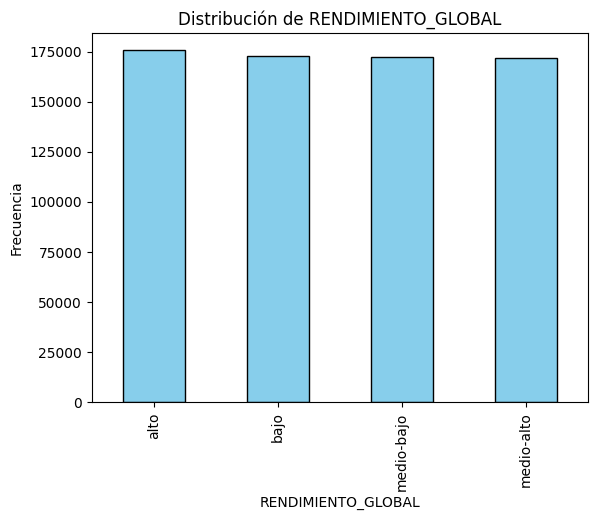

In [21]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"--- {col} ---")
    print(f"Número de valores únicos: {df[col].nunique()}")
    print(f"Valores más frecuentes:\n{df[col].value_counts(normalize=True).head(5)}\n")
    print(f"Moda: {df[col].mode().iloc[0] if not df[col].mode().empty else 'Sin datos'}")
    print("-" * 50)

    # --- (Opcional) Gráfico ---
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


In [22]:
summary = pd.DataFrame({
    'columna': cat_cols,
    'valores_unicos': [df[c].nunique() for c in cat_cols],
    'valor_moda': [df[c].mode().iloc[0] if not df[c].mode().empty else None for c in cat_cols],
    'porcentaje_nulos': [df[c].isna().mean()*100 for c in cat_cols]
})

In [23]:
summary

,columna,valores_unicos,valor_moda,porcentaje_nulos
0,PERIODO_ACADEMICO,9,20195,0.000000
1,E_PRGM_ACADEMICO,948,DERECHO,0.000000
2,E_PRGM_DEPARTAMENTO,31,BOGOTÁ,0.000000
3,E_VALORMATRICULAUNIVERSIDAD,8,Entre 1 millón y menos de 2.5 millones,0.907870
4,E_HORASSEMANATRABAJA,5,Más de 30 horas,4.455884
5,F_ESTRATOVIVIENDA,7,Estrato 2,4.640722
6,F_TIENEINTERNET,2,Si,3.845343
7,F_EDUCACIONPADRE,12,Secundaria (Bachillerato) completa,3.347004
8,F_TIENELAVADORA,2,Si,5.743394
9,F_TIENEAUTOMOVIL,2,No,6.299350


Despues de esto nos damos cuenta que probablemente la variable *E_PRIVADO_LIBERTAD* puede eliminarse del dataset debido a que todas las respuestas son la misma y puede no ser influyente (sin embargo dependerá mucho del contexto de la variable y obviamente en caso de que una persona este privada de la libertad se espera que no pueda presentar las pruebas saber pro)

## Distribuciones de las variables numericas

Se hace un analisis similar a las categoricas, esta vez usando tambien boxplots, pues permiten detectar un poco mejor los outliers.

Variables numéricas encontradas: ['ID', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']

Resumen estadístico general:

                count           mean            std  min         25%  \
ID           692500.0  494606.130576  285585.209455  1.0  247324.750   
INDICADOR_1  692500.0       0.268629       0.122130  0.0       0.203   
INDICADOR_2  692500.0       0.259996       0.093480  0.0       0.212   
INDICADOR_3  692500.0       0.262087       0.058862  0.0       0.254   
INDICADOR_4  692500.0       0.262903       0.067944  0.0       0.255   

                    50%         75%         max  
ID           494564.500  741782.500  989286.000  
INDICADOR_1       0.240       0.314       0.657  
INDICADOR_2       0.271       0.309       0.487  
INDICADOR_3       0.276       0.293       0.320  
INDICADOR_4       0.285       0.303       0.332  

--- INDICADOR_1 ---
Valores nulos: 0
Media: 0.27
Mediana: 0.24
Desviación estándar: 0.12
Posibles outliers: 68120


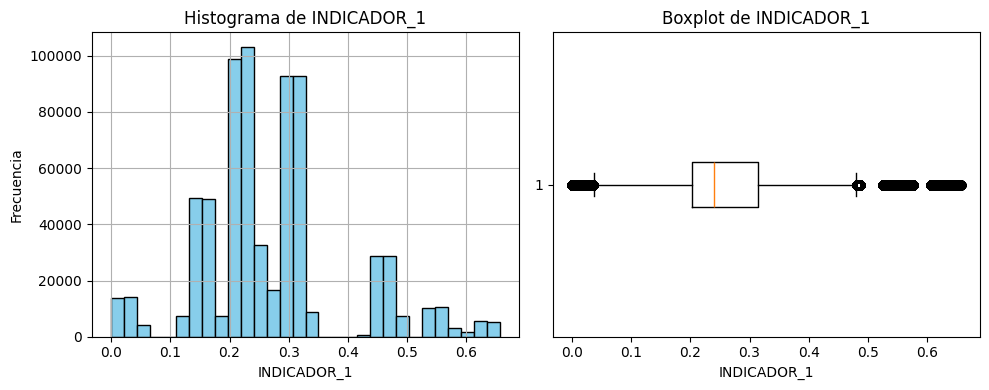


--- INDICADOR_2 ---
Valores nulos: 0
Media: 0.26
Mediana: 0.27
Desviación estándar: 0.09
Posibles outliers: 34162


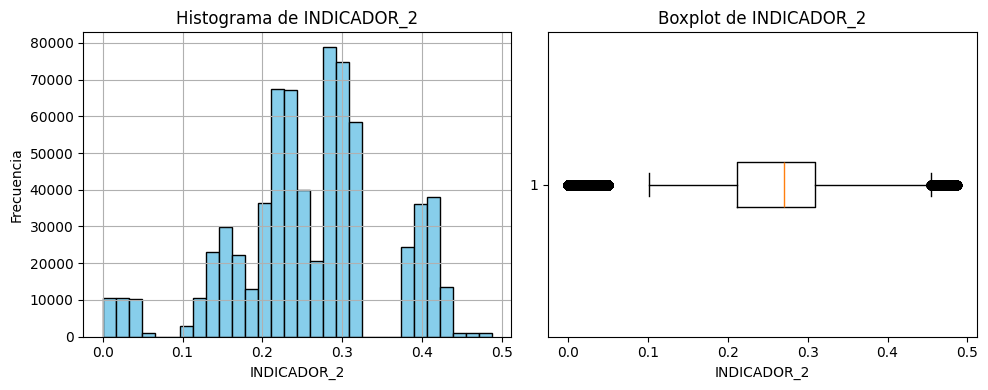


--- INDICADOR_3 ---
Valores nulos: 0
Media: 0.26
Mediana: 0.28
Desviación estándar: 0.06
Posibles outliers: 36488


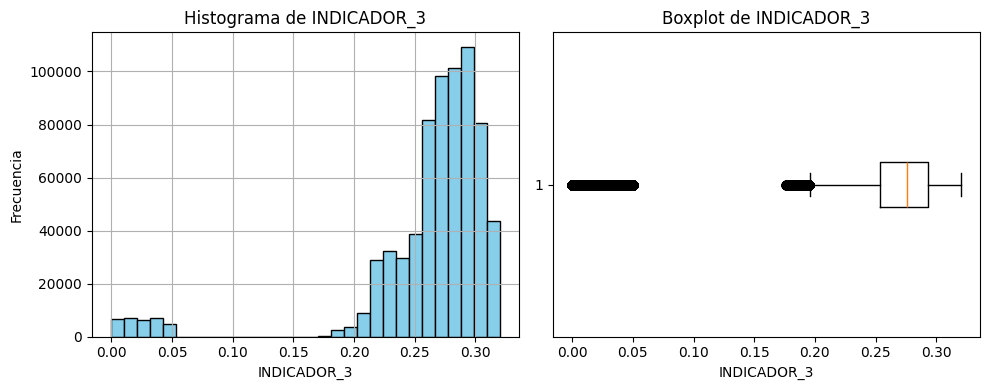


--- INDICADOR_4 ---
Valores nulos: 0
Media: 0.26
Mediana: 0.28
Desviación estándar: 0.07
Posibles outliers: 71389


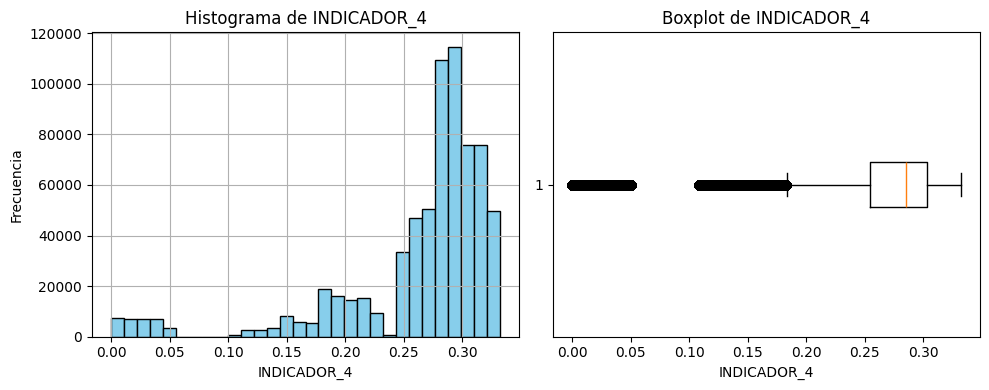

In [25]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(f"Variables numéricas encontradas: {list(num_cols)}\n")

# --- Estadísticas básicas ---
print("Resumen estadístico general:\n")
print(df[num_cols].describe().T)

exception_col = "ID"
# --- Análisis variable por variable ---
for col in num_cols:
    if col == exception_col:
        continue
    print(f"\n--- {col} ---")
    print(f"Valores nulos: {df[col].isna().sum()}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")
    print(f"Desviación estándar: {df[col].std():.2f}")

    # Outliers estimados por rango intercuartil
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Posibles outliers: {outliers}")

    # --- Histogramas ---
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    # --- Boxplot ---
    plt.subplot(1,2,2)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [26]:
target = "RENDIMIENTO_GLOBAL"
df[target] = df[target].astype('category')

In [27]:
from scipy.stats import chi2_contingency, f_oneway

## Variables numericas vs RENDIMIENTO GLOBAL

En esta seccion del notebok empezamos a evaluar la variable respuesta contra las diferentes variables, para el caso de las variables numericas se usaron multiples boxplots (uno por cada categoria de la variable respuesta) de modo que podamos ver las diferencias en distribucion entre cada clasificacion dada la columna, además se usó el valor p para determinar si una variable era significativa en el modelo (esto no determina que lo sea al 100%, pues el modelo puede no ser significativo pero las variables si serlo y viceversa).

=== Análisis numérico vs RENDIMIENTO_GLOBAL ===

→ ID

→ INDICADOR_1
ANOVA p-value: 0.00000000 (Significativo)


C:\Users\JUANJO\AppData\Local\Temp\ipykernel_11804\115167421.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set2")


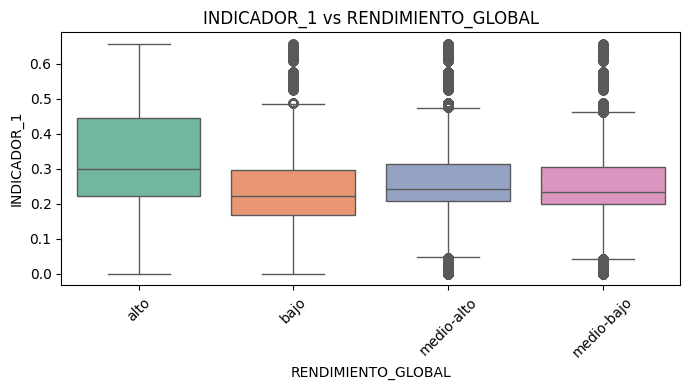


→ INDICADOR_2
ANOVA p-value: 0.00000000 (Significativo)


C:\Users\JUANJO\AppData\Local\Temp\ipykernel_11804\115167421.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set2")


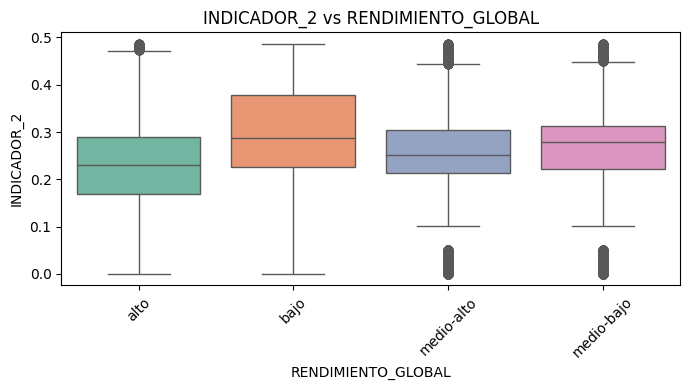


→ INDICADOR_3
ANOVA p-value: 0.00000000 (Significativo)


C:\Users\JUANJO\AppData\Local\Temp\ipykernel_11804\115167421.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set2")


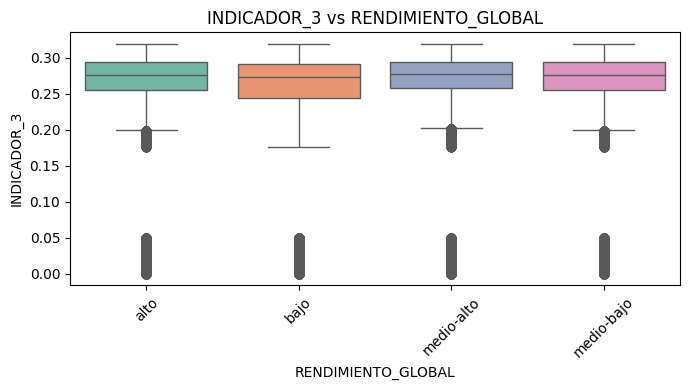


→ INDICADOR_4
ANOVA p-value: 0.00000000 (Significativo)


C:\Users\JUANJO\AppData\Local\Temp\ipykernel_11804\115167421.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set2")


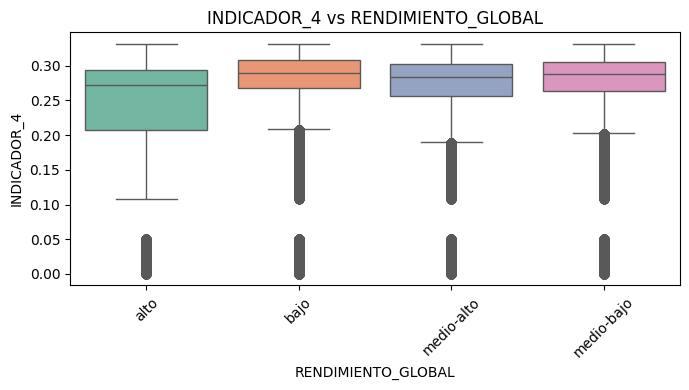

In [28]:
print("=== Análisis numérico vs RENDIMIENTO_GLOBAL ===")

exception_col = "ID"

for col in num_cols:
    print(f"\n→ {col}")
    if col == target or col == exception_col:
        continue
    grupos = [df[df[target] == cat][col].dropna() for cat in df[target].unique()]
    
    # ANOVA para comparar medias entre categorías
    try:
        stat, p = f_oneway(*grupos)
        print(f"ANOVA p-value: {p:.8f} {'(Significativo)' if p < 0.05 else ''}")
    except Exception as e:
        print(f"Error en ANOVA: {e}")
    
    # --- Gráfico boxplot/violin ---
    plt.figure(figsize=(7,4))
    sns.boxplot(x=target, y=col, data=df, palette="Set2")
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Todos los indicadores numericos demostraron ser significativos y relevantes, las distribuciones muestran diferencias significativas, pero tambien un sesgo alto de la distribucion (tambien visto en las graficas de arriba)

## Variables categoricas vs RENDIMIENTO GLOBAL

Respecto a las variables categoricas, se decidió prescindir de las columnas *E_PRGM_ACADEMICO* y *E_PRGM_DEPARTAMENTO* debido a que el numero de categorias es demasiado alta y no permite una correcta visuaizacion de las distribuciones, tambien se realizó una prueba chi**2 para determinar si el valor p es significativo entre las dos variables categoricas.


=== Análisis categórico vs RENDIMIENTO_GLOBAL ===

→ PERIODO_ACADEMICO
Chi-cuadrado p-value: 0.00000000 (Significativo)


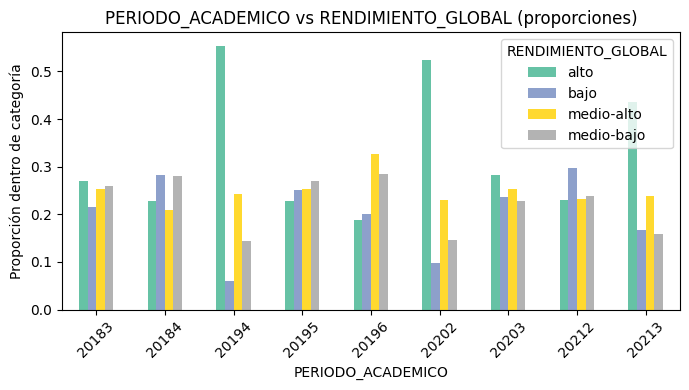


→ E_VALORMATRICULAUNIVERSIDAD
Chi-cuadrado p-value: 0.00000000 (Significativo)


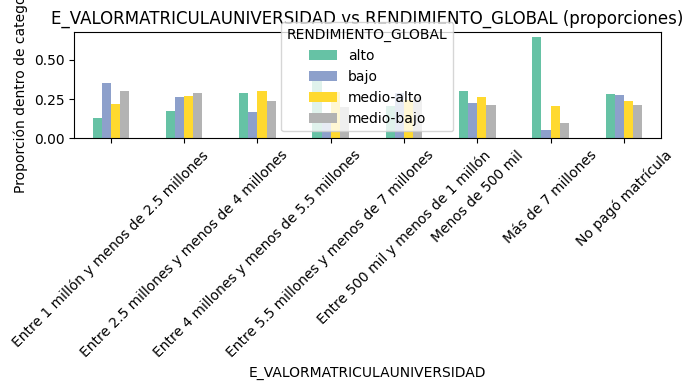


→ E_HORASSEMANATRABAJA
Chi-cuadrado p-value: 0.00000000 (Significativo)


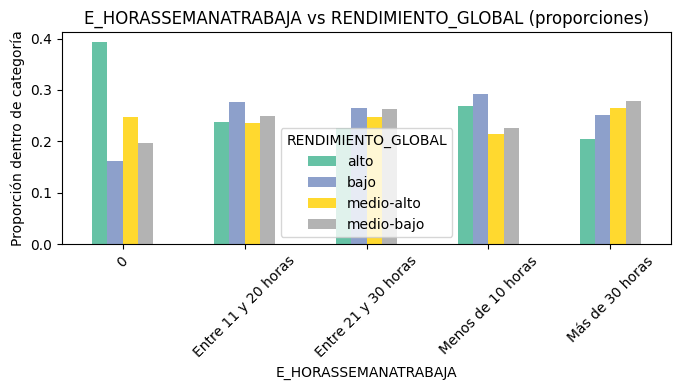


→ F_ESTRATOVIVIENDA
Chi-cuadrado p-value: 0.00000000 (Significativo)


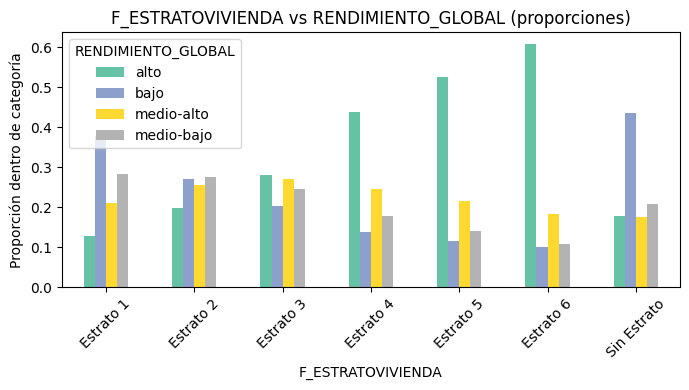


→ F_TIENEINTERNET
Chi-cuadrado p-value: 0.00000000 (Significativo)


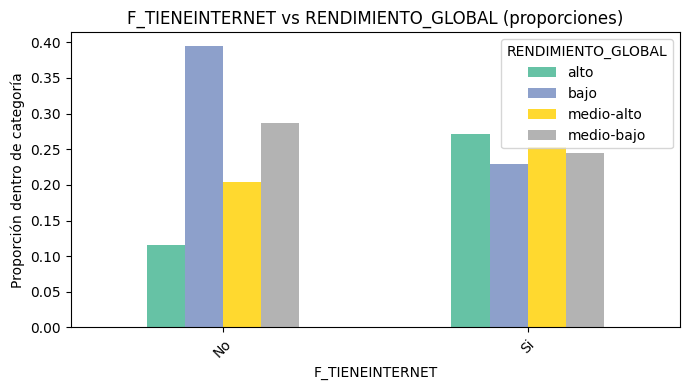


→ F_EDUCACIONPADRE
Chi-cuadrado p-value: 0.00000000 (Significativo)


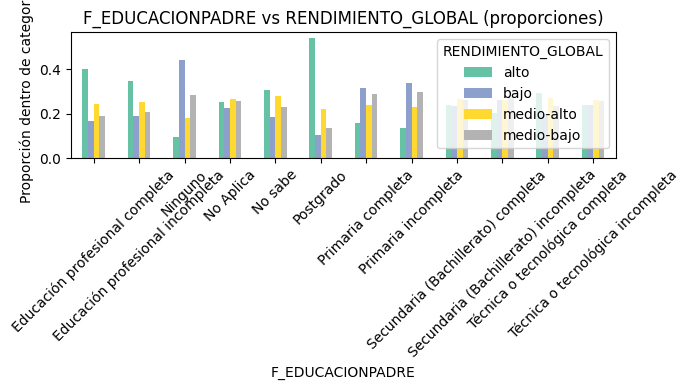


→ F_TIENELAVADORA
Chi-cuadrado p-value: 0.00000000 (Significativo)


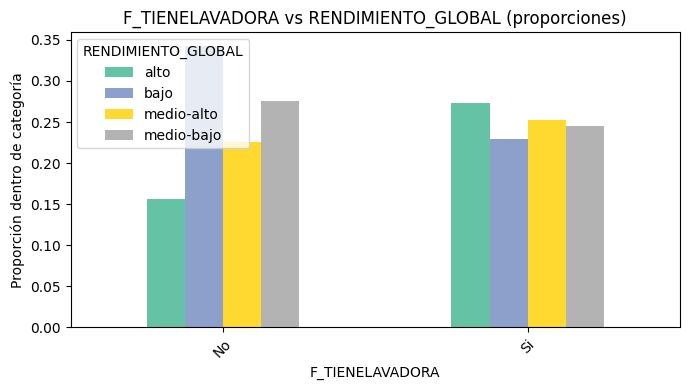


→ F_TIENEAUTOMOVIL
Chi-cuadrado p-value: 0.00000000 (Significativo)


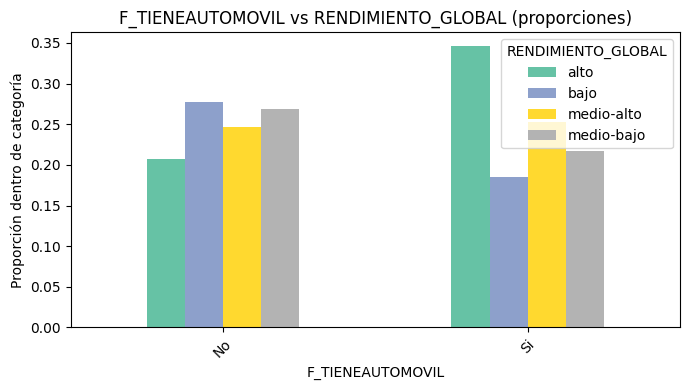


→ E_PRIVADO_LIBERTAD
Chi-cuadrado p-value: 0.26996148 


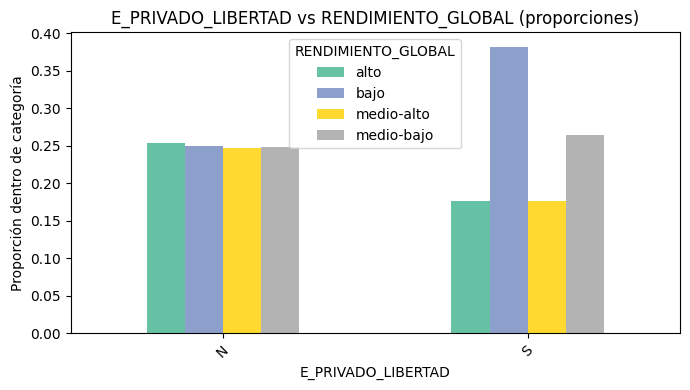


→ E_PAGOMATRICULAPROPIO
Chi-cuadrado p-value: 0.00000000 (Significativo)


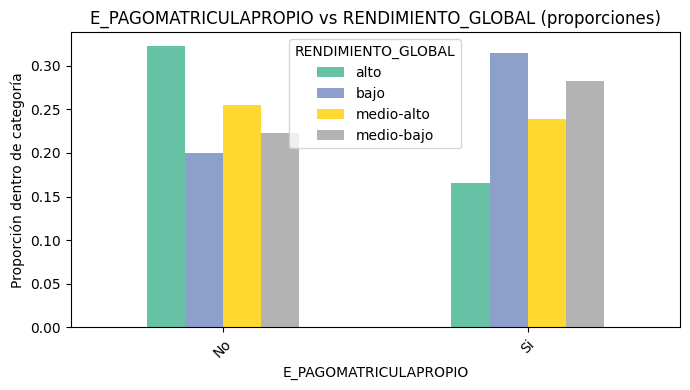


→ F_TIENECOMPUTADOR
Chi-cuadrado p-value: 0.00000000 (Significativo)


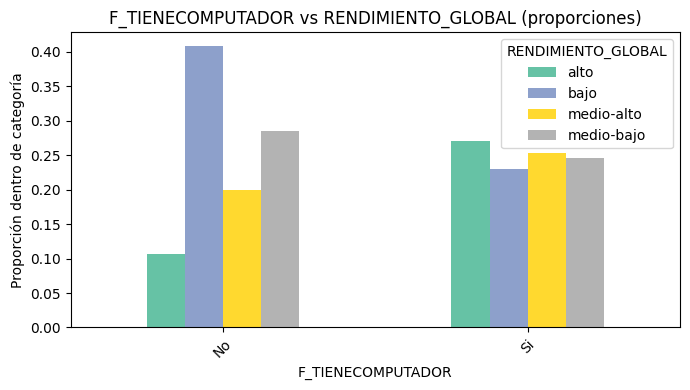


→ F_TIENEINTERNET.1
Chi-cuadrado p-value: 0.00000000 (Significativo)


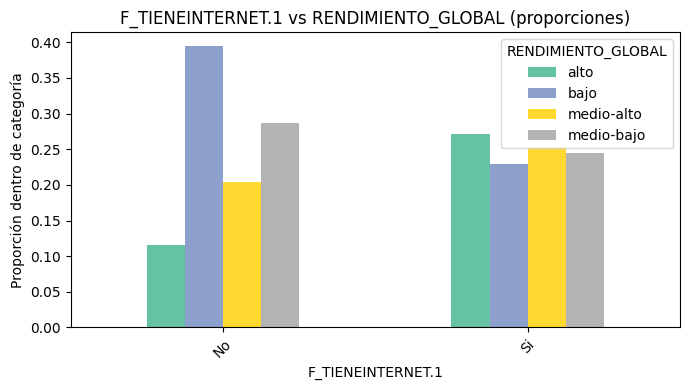


→ F_EDUCACIONMADRE
Chi-cuadrado p-value: 0.00000000 (Significativo)


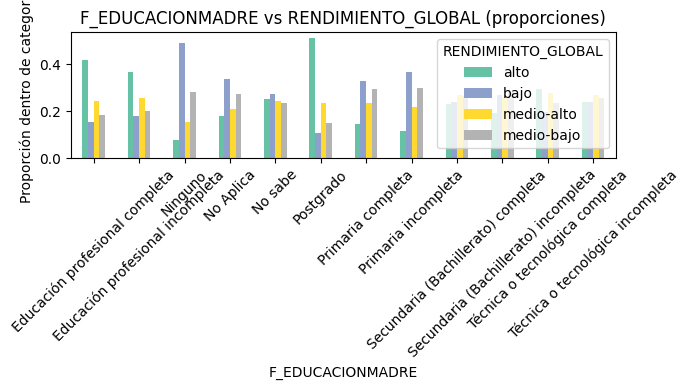

In [29]:
print("\n=== Análisis categórico vs RENDIMIENTO_GLOBAL ===")

exceptions = ["E_PRGM_ACADEMICO", "E_PRGM_DEPARTAMENTO"]

for col in cat_cols:
    if col == target or col in exceptions:
        continue

    print(f"\n→ {col}")
    cont = pd.crosstab(df[col], df[target])
    chi2, p, dof, exp = chi2_contingency(cont)
    print(f"Chi-cuadrado p-value: {p:.8f} {'(Significativo)' if p < 0.05 else ''}")

    # --- Gráfico de barras agrupadas ---
    cont_norm = cont.div(cont.sum(axis=1), axis=0)
    cont_norm.plot(kind='bar', stacked=False, figsize=(7,4), colormap='Set2')
    plt.title(f"{col} vs {target} (proporciones)")
    plt.ylabel("Proporción dentro de categoría")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Tal y como se esperaba, la variable *E_PRIVADO_LIBERTAD* muestra no ser significativa, entonces se puede eliminar dado el caso en una siguiente etapa del proceso.